# Generate backtest

In [1]:
%run ./functions/LoadPampusData.ipynb
%run ./models/BaseCaseYesterday.ipynb

In [2]:
# import packages
import pandas as pd
import datetime as datetime
import numpy as np
import matplotlib.pyplot as plt #gives error the first time, just try again# Show all cell outputs:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
# Load data
file = '../data/HISTORY15MINS.csv'
data = LoadPampusData(file)

In [4]:
# subset data to single timeseries (ts)
seriesname = 'LOAD_1_TOTW_2'
ts1 = data[seriesname]['2016-01-01':'2016-12-23'] #subset where data is most complete

In [5]:
# Define model
model = BaseCaseYesterday
# Define datetimeFCvector
datetimeFCVector = pd.date_range('2016-12-01 00:00:00', periods = 30, freq='D')

resultDF = pd.DataFrame()
for date in datetimeFCVector:
    result = pd.DataFrame(model(ts1, date));
    result['created'] = date;
    resultDF = resultDF.append(result);

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: Insufficient data to forecast datetime. Returning empty series


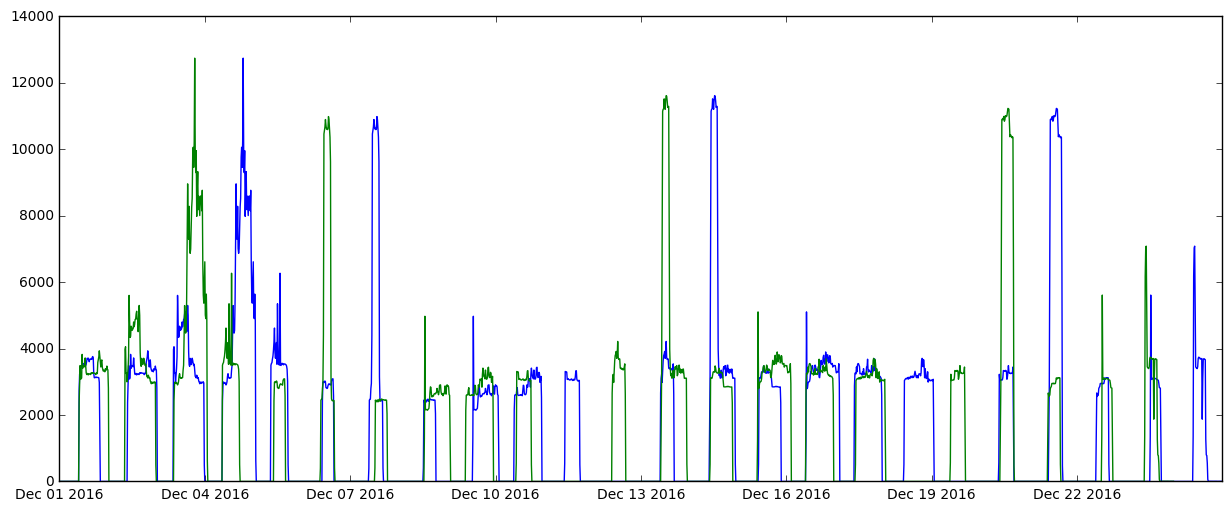

In [6]:
plt.plot(resultDF[seriesname])
plt.plot(ts1['2016-12-01':])
plt.show();

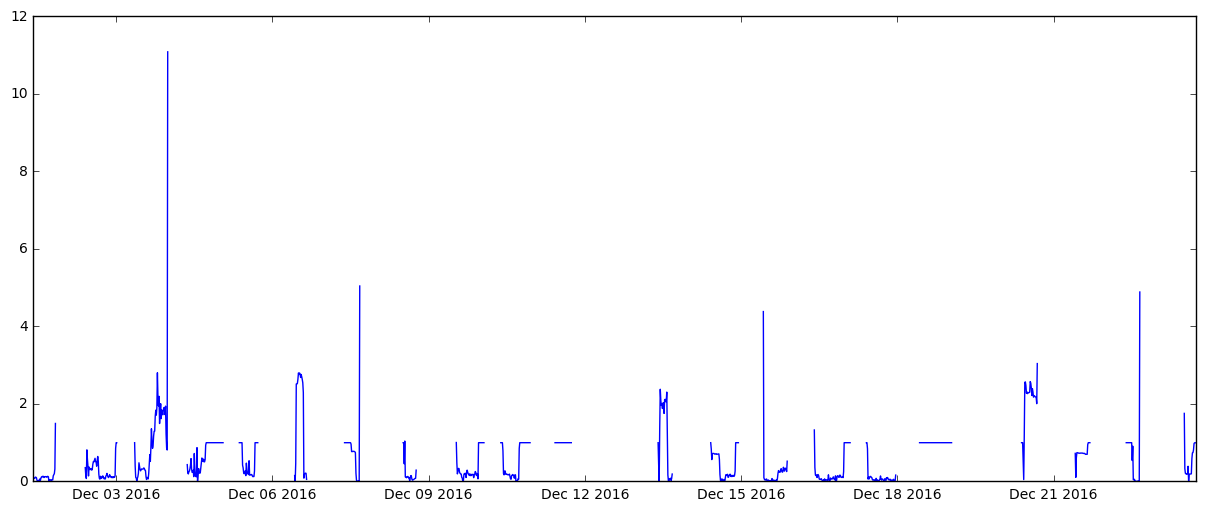

In [7]:
plt.plot(abs((ts1['2016-12-01':]-resultDF[seriesname])/resultDF[seriesname]))


In [8]:
#df.replace([np.inf, -np.inf], np.nan)
MAPE = 100/len(abs((ts1['2016-12-01':]-resultDF[seriesname])/resultDF[seriesname]).replace([np.inf, -np.inf], np.nan).dropna()) * sum(abs((ts1['2016-12-01':]-resultDF[seriesname])/resultDF[seriesname]).replace([np.inf, -np.inf], np.nan).dropna())
print(MAPE)

63.1282786341
